# On convolution filtering

Say, we have a signal of a certain shape, and we want to create an ideal filter to detect this signal. What would be the shape?

Assuming L2 metrix, we have:

$dL/dw = 2(L-y)x$

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

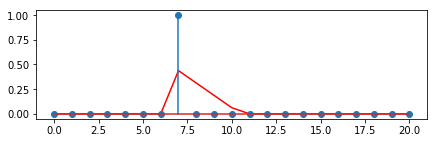

In [103]:
n = 7

y = np.zeros(3*n)
y[n] = 1

x = np.zeros(3*n)
for i in range(n,len(x)):
    #x[i] = np.exp(-(i-n)/2)**2
    x[i] = max(0,len(x)-i*2)
# x += np.random.randn(len(x))*0.1
    
x = x/sum(x)
plt.figure(figsize=(7,2))
plt.plot(x,'r-');
plt.stem(y);

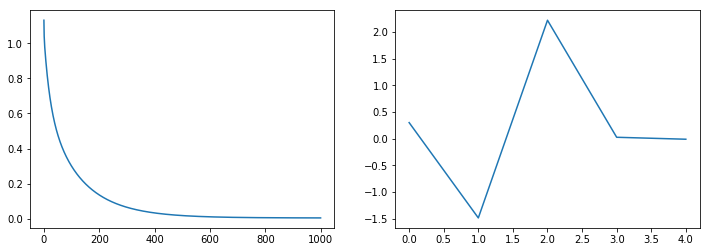

In [107]:
wing = 2
w = np.random.rand(2*wing + 1)
b = 0

alpha = 0.05
n_steps = 1000

L = np.zeros(n_steps)
for t in range(n_steps):
    for i in range(len(x)-len(w)):
        Y = np.dot(w,x[i:i+len(w)])+b     # Convolution layer
        dw = (y[i+wing]-Y)*x[i:i+len(w)]
        L[t] += (Y-y[i+wing])**2
        w += dw*alpha
        b += (y[i]-Y)*alpha
    
# Plots
plt.figure(figsize=(12,4))
plt.subplot(121);
plt.plot(L);
plt.subplot(122);
plt.plot(w);

So an optinal filter to detect a ramp looks like a flip: down-up (if cross-correlating, as I do it here, or up-down, if using mathematical convolution, that is reversed).

What does it tell us about the shape of devonvolutional kernels? Hard to tell (it feels like I should know that, but I don't remember...)

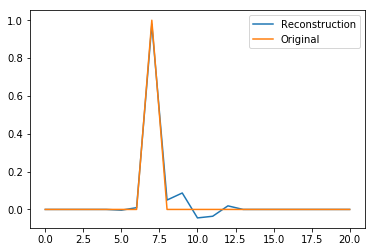

In [126]:
Y = np.zeros(len(x))
for i in range(wing,len(x)-wing):
    Y[i] = np.dot(w,x[i-wing:i+wing+1])
    
# plots
plt.plot(Y, label="Reconstruction");
plt.plot(y, label='Original');
plt.legend(loc='upper right');

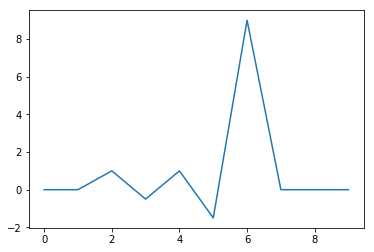

In [125]:
# Manual approximation :)
a = np.array([0,0,1,2,3,0,0])
b = np.flip(np.array([0,3,-2.5,1]))
plt.plot(np.convolve(a,b));